In [1]:
import pandas as pd 
import numpy as np
import nltk 
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sibongiletoure/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
music_df = pd.read_csv('music.csv')

In [56]:
music_df.drop(columns=['Unnamed: 0','artists_y'],inplace=True)

In [57]:
music_df = music_df.dropna(subset=['lyrics']).reset_index(drop=True)

In [58]:
music_df

,acousticness,artists_x,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,name,popularity,release_date,speechiness,tempo,valence,year,lyrics,primary_artist,genres
0,0.872000,"['$NOT', 'SUS Valentino']",0.566,114547,0.541,1,4yxFC6hIvXlD1YAtbuxcof,0.000038,5,0.1740,...,Lovely,59,2018-03-25,0.2900,87.020,0.5520,2018,"Look up at the sun but when I see it, I just c...",$NOT,"['east coast hip hop', 'gangster rap', 'hardco..."
1,0.606000,"['$NOT', 'Maggie Lindemann']",0.713,187587,0.470,1,3oGbHF3Kdwf3AsRCbBjUxu,0.000013,9,0.3060,...,Moon & Stars (feat. Maggie Lindemann),69,2020-03-06,0.0864,84.518,0.0825,2020,"(Yung Castor) Ayy, bitch, I'll take you to the...",$NOT,"['east coast hip hop', 'gangster rap', 'hardco..."
2,0.164000,"['$NOT', 'Wifisfuneral']",0.807,160731,0.564,1,0lB24x4SNbi8lLhUAsdoMO,0.000000,6,0.0804,...,BERETTA (feat. Wifisfuneral),64,2020-03-06,0.3190,96.004,0.2250,2020,"Gang, gang Yuh, ayy I need it now (Yuh), if I...",$NOT,"['east coast hip hop', 'gangster rap', 'hardco..."
3,0.336000,"['$NOT', 'Night Lovell']",0.757,172253,0.625,1,4zrYnAzX1CMRt9SoZdixMz,0.345000,1,0.1290,...,Human (feat. Night Lovell),65,2020-05-22,0.1430,146.023,0.3890,2020,"Ah, hahaha Ah, fuck this shit Fuck this shit, ...",$NOT,"['east coast hip hop', 'gangster rap', 'hardco..."
4,0.814000,['$NOT'],0.819,120000,0.462,1,3q8ms2oRMFsyxUYYKDiXIP,0.000016,0,0.3180,...,GOSHA,65,2018-09-14,0.4850,159.873,0.5000,2018,"Ayy, nigga, I know you care about Gosha and pr...",$NOT,"['east coast hip hop', 'gangster rap', 'hardco..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109688,0.000004,['Whiplash'],0.495,210987,0.958,0,1Ks2UecuMS4C0XVjNhtz0w,0.105000,11,0.0569,...,Last Man Alive,33,1985-01-01,0.0780,120.872,0.2120,1985,Take a look to the sky for your pot of gold Yo...,Whiplash,"['death metal', 'metal', 'old school thrash', ..."
109689,0.000004,['Whiplash'],0.348,252973,0.956,0,7x0eznaiq2CaLUfOqiUSvt,0.070900,8,0.3650,...,Power Thrashing Death,34,1985-01-01,0.0981,96.079,0.4220,1985,Inject it into the blood directly into the vei...,Whiplash,"['death metal', 'metal', 'old school thrash', ..."
109690,0.159000,['Whiskey Myers'],0.389,197187,0.834,0,4lXBIshfa0juWxi6odtLHt,0.000000,9,0.1160,...,Early Morning Shakes,49,2014-02-04,0.0851,152.346,0.5310,2014,I've been out here praying for sunshine All I ...,Whiskey Myers,"['modern southern rock', 'texas country']"
109691,0.243000,['Whiskey Myers'],0.438,335623,0.477,0,4rJesaufMl2xD0f2G8Xgnd,0.000008,0,0.1830,...,Stone,63,2016-09-09,0.0310,137.645,0.1760,2016,Well the night is my companion and the highway...,Whiskey Myers,"['modern southern rock', 'texas country']"


## Clean music lyrics
* Remove nonenligsh song 
* Remove songs above 900 words and below 50 words
* Average song length is 200-500 words

In [59]:
!pip install langdetect
from langdetect import detect
def remove_non_english(text):
    try:
        lang = detect(text)
        if lang == 'en':
            result = text
        else:
            result = None
    except:
        result = text
    return result

In [60]:
corpus = music_df['lyrics']

In [61]:
lyrics_len_list = []
for line in corpus:
    #print(line.split(" "))
    lyrics_len_list.append(len(line.split(" ")))

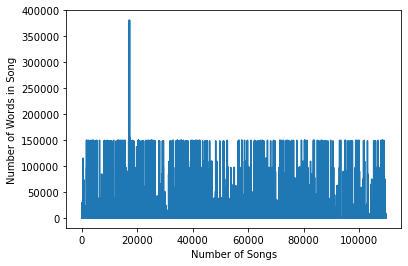

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.arange(0,len(lyrics_len_list)), y=lyrics_len_list)
plt.xlabel('Number of Songs')
plt.ylabel('Number of Words in Song')
plt.show();

In [63]:
import numpy as np
count = 0
for i in lyrics_len_list:
    if i > 900 or i < 50:
        count+=1

In [64]:
count

13464

In [65]:
for ix,line in enumerate(music_df['lyrics']):
    if len(line.split(" ")) > 10000:
          music_df.drop(ix,inplace=True)

In [66]:
music_df.reset_index(drop=True,inplace=True)

In [67]:
music_df['lyrics'] = music_df['lyrics'].apply(remove_non_english)

## Upon some inspection some artist have incorrect lyrics
* Will drop those artist

In [68]:
artists = ['Al Bowlly','Francisco Canaro', 'Jelly Roll Morton','Marty Murray','Numba 9','Slowburner','Barbara Cook','Louis Armstrong','Paul Whiteman','Carroll Gibbons','Giuseppe Giordani','Steve Correll Group','Duke Ellington',\
          'Jack Payne', 'Joe Quartz', 'Mississippi Sheiks','Raquel Meller','Robert David Hall','Robert Francis',\
         'Rock Projection', 'Shorty Bralik', 'The Executor', 'The New Yorkers','Jack Payne',\
         'Dick Justice','Jeff Beatman','Ninon Vallin','Charpin,Henry Hall','Art Tatum','Roy Fox','SURF',\
        'Bunny Berigan','Jack Jackson & His Orchestra','Jeff Henry','Metronome All Star Band','Nomy,Orchestra'  ,\
          'Django Reinhardt', 'Gion, Jeff Stetson', 'Glenn Miller' , 'Lonnie Johnson', 'Ludwig van Beethoven', \
          'P. Maximilian', 'Richard Wagner', 'Sylvia de Grasse', 'Tommy Dorsey','Charlie Chaplin', 'Count Basie',\
         'Mary Martin', 'Miles Davis', 'Mildred Bailey','Alice Faye',\
          'Big Maceo', 'Hot Lips page', 'Mushy Peas', 'Sonny Davis', 'The 1937 Flood', 'Walter La Ganga', 'Sonny Boy Williamson II',\
           'Dick Haymes', 'The Lion', 'Jesus Sosa', 'Joan Elliso',  'Lead Belly', 'P. Mobil', 'The Cotton Club'\
           'Richard Levitt', 'Malathi', 'The Executor', 'A.J. Croce', 'Ken Elkinson', 'Lena Horne', 'Local Oafs', 'Arthur Treacher', \
          'Asha Bhosle', 'Carlo Buti','Dmitri Shostakovich','Earl Robinson', 'Fred Astaire', 'Jean Sibelius', 'Mina', 'Natalino Otto',\
          'Orchestra Studio 7', 'Rajkumari', 'Alfred Newman', 'Richard Rodgers', '9 Days Wonder', 'Betty Grable','Don Byas','Lester Young',\
           'Memphis Slim', 'Stan Getz', 'Erroll Garner','The Hollywood Four Blazes', 'Buck Clayton', 'Neilson Taylor','Ella Logan',\
         'Joe Mooney', 'Jerry Laws', 'Hubert Fol', 'Merle Travis', 'Lon Hoyt', 'Roy Eldridge', 'Sheela', 'Sonny Terry','The Soft Winds',\
           'Dizzy Gillespie', 'Candy Johnson', 'Johnny Green', 'Charles Mingus', 'George Gershwin', 'John Lewis', 'Kurt Weill', 'Danny Kaye',\
         'Lord Melody','Esquivel!','Johnny Copper', 'Ogden Nash', 'Ouija Macc','Randy Cade','Ted Heath','Ahmad Jamal','Benny Carter',\
           'Bill Clifton','Buddy Weed','Flip Phillips','Josh White','Ken Griffin','Lefty Frizzell']

In [69]:
for artist in artists:
    music_df = music_df[music_df.primary_artist!=artist]

In [70]:
music_df.reset_index(inplace=True,drop=True)

## Spotify contains many subgenres
* Will look for the key genre within the subgenre and add it to the dataframe

In [71]:
genre_list = []
for genre in music_df.genres:
    if 'pop' in str(genre):
        genre_list.append('Pop')
    elif 'r&b' in str(genre):
        genre_list.append('R&B')
    elif 'hip hop' in str(genre):
        genre_list.append('Hip-Hop')
    elif 'country' in str(genre):
        genre_list.append('Country')
    elif 'rock' in str(genre):
        genre_list.append('Rock')
    elif 'indie' in str(genre):
        genre_list.append('Indie')
    elif 'blues' in str(genre):
        genre_list.append('Blues')
    elif 'jazz' in str(genre):
        genre_list.append('Jazz')
    elif 'electronic' in str(genre):
        genre_list.append('Electronic')
    elif 'folk' in str(genre):
        genre_list.append('Folk')
    else:
        genre_list.append(None)

In [72]:
music_df['genre'] = genre_list

## Plots to see the behavior of the genres

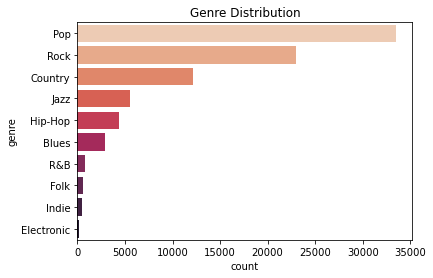

In [33]:
import seaborn as sns
sns.countplot(y='genre', data=music_df ,palette='rocket_r',order = music_df['genre'].value_counts().index)
plt.title('Genre Distribution');

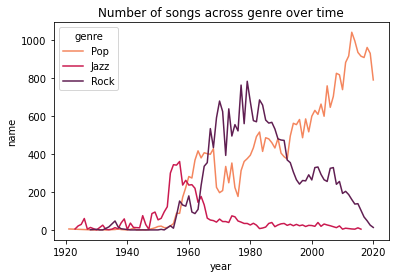

In [36]:
genre_df = music_df.groupby(['year','genre'])['name'].count()


genre_df = genre_df.reset_index()

genre_df = genre_df[genre_df.genre.isin(['Pop','Rock','Jazz'])]

sns.lineplot(data=genre_df,x='year', 
             y='name',hue='genre',palette='rocket_r');
plt.title('Number of songs across genre over time');

## Energy and Valence are two key features in determining mood
* Want to see how those perform over time

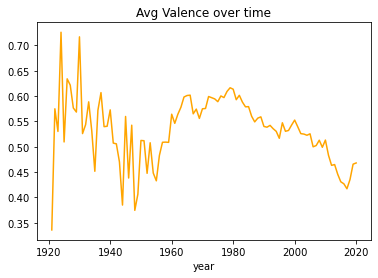

In [37]:
music_df.groupby('year')['valence'].mean().plot(kind='line',color='orange');
plt.title('Avg Valence over time');

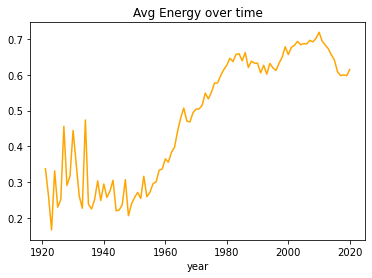

In [38]:
music_df.groupby('year')['energy'].mean().plot(kind='line',color='orange');
plt.title('Avg Energy over time');

## Lyrics are the next thing
* Will perform sentiment analysis in this notebook and topic modeling in another

In [73]:
music_df = music_df.sample(n=30000, random_state=1).reset_index(drop=True)

In [74]:
corpus = music_df['lyrics']

In [75]:
corpus

0        Hee-haw! Hee-haw! Hee-haw!  When you left, the...
1        Down by the Jordan it's early in the morning T...
2        Wonderful, marvelous You should care for me! A...
3        Where were you in sixty-eight? In sixty-eight,...
4        I am dejected. I am depressed Yet resurrected ...
                               ...                        
29995    Oh, how the breakers roar Keep pulling me fart...
29996    The very thought of you And I forget to do Tho...
29997    I don't know how I'm going to tell you I can't...
29998    I tried to love you, I thought I could I tried...
29999    You know those days Those days where you're sa...
Name: lyrics, Length: 30000, dtype: object

In [53]:
negative = []
neutral = []
positive = []
compound = []
#Initialize the model
sid = SentimentIntensityAnalyzer()
for lyrics in corpus:
    scores = sid.polarity_scores(str(lyrics))
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

In [76]:
music_df['scores'] = compound

In [77]:
music_df['comp_score'] = music_df['scores'].apply(lambda c: 'pos' if c >=0.5  else ('neg' if c <= -0.5  else 'neu'))

In [78]:
sentiment_df = music_df.groupby('genre')['scores'].mean().reset_index()

<AxesSubplot:xlabel='scores', ylabel='genre'>

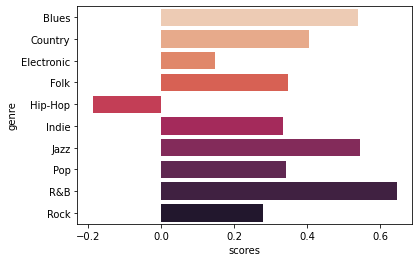

In [79]:
sns.barplot(x="scores", y="genre", data=sentiment_df,palette='rocket_r')